In [52]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./data/wandb_export_2025-08-30T10_12_53.648+02_00.csv")

In [17]:
experiments = df.loc[df["Name"].str.contains("S3R1") & (df["batch_size"] == 1024), "icm_skip_interval"].value_counts(dropna=False)

In [ ]:
experiments.index = 1/experiments.index
experiments.index = experiments.index.fillna(0)

In [29]:
experiments.sum()

np.int64(22)

<AxesSubplot: xlabel='icm_skip_interval'>

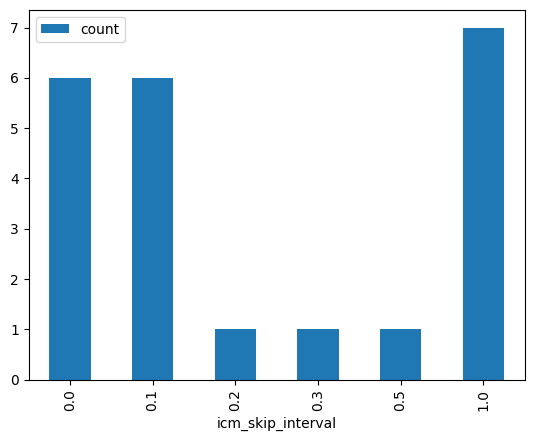

In [68]:
(experiments
 .reset_index()
 .set_index("count")
 .apply(lambda x: np.floor(x*10)/10)
 .reset_index()
 .groupby("icm_skip_interval")
 .sum()
 .reset_index()
 .sort_values("icm_skip_interval")
 .plot(x="icm_skip_interval", y="count", kind="bar"))

37 runs must still be run:
- 4 per skip prob [0.2, 0.3, 0.5]
- 5 per skip prob [0.4, 0.6, 0.7, 0.8, 0.9]
